## *2025 Spring DSAA 2011 Maching Learning*
## Lab Note 02
*Zixin Zhong*\
*Hong Kong University of Science and Technology (Guangzhou)*


**Important note**: make sure Python can be used in your computer.\
Following is instruction for using Jupyter lab:
1. Download the installer and install Python: https://www.python.org/downloads/
2. Install Jupyterlab by typing in ‘Command prompt’: pip install jupyterlab
3. Run Jupyterlab by typing in ‘Command prompt’: jupyter lab
4. Install packages as needed with ‘Command prompt\
e.g. to install numpy, type: pip install numpy


**Question 1.** What is the difference between online learning and offline learning?

**Question 2.** Prove $1/\theta$ is the expectation of exponential distribution with
\begin{align}
f_X(x ; \theta)=\left\{\begin{array}{cc}
\theta \exp (-\theta x) & x \geq 0 \\
0 & x<0
\end{array}. \right.
\end{align}
Hint: check the integral by parts.

since $\frac{\mathrm{d}(\exp(-\theta x))}{\mathrm{d} x} = \exp(-\theta x)\cdot (-\theta) $, then we have
$$
\begin{aligned}
\mathbb{E}[X]=&\int _0^{+\infty} x\cdot \theta \exp(-\theta x) \mathrm{d} x \\
=&-\int _0^{+\infty} x\cdot \mathrm{d}(\exp(-\theta x)) \\
=&[-x \cdot \exp(-\theta x)]_{0}^{+\infty}+\int _0^{+\infty} \exp(-\theta x) \mathrm{d} x \\
=&0-\frac{1}{\theta}\int_{0}^{-\infty} \exp(-\theta x) \mathrm{d} (-\theta x)\\
=&-\frac{1}{\theta}[\exp(x)]_0^{-\infty} \\
=&-\frac{1}{\theta}(0 - 1) \\
=&\frac{1}{\theta}
\end{aligned}
$$

**Question 3.** Let $\mathcal{D} = \{X_1,\ldots,X_n\}$ be a set of $n$ samples independently drawn from the univariate Gaussian distribution with 
$$\begin{align}
f_X\left(x ; \mu, \sigma^2\right)=\mathcal{N}\left(x ; \mu, \sigma^2\right)=\frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{1}{2 \sigma^2}(x-\mu)^2\right) \quad x \in \mathbb{R}.
\end{align}$$
Derive the formula of maximum likelihood estimation (MLE) of mean $\mu$ and variance $\sigma^2$.

Let $\hat \mu, \hat \sigma$ be the MLE of $\mu$ and $\sigma$ .
Then let $F(\mu, \sigma^2):=\prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{1}{2\sigma ^2}(X_i-\mu)^2\right)$

Then we have :
$$
F(\mu, \sigma^2)=(\frac{1}{\sqrt{2\pi \sigma^2}})^n \exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n (X_i-\mu)^2\right)
$$
Then we let :
$$
G(\mu, \sigma^2):=\ln F(\mu, \sigma^2)
$$
Then :
$$
\begin{aligned}
G(\mu, \sigma^2)&=n\ln \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) -\frac{1}{2\sigma^2}\sum_{i=1}^n (X_i-\mu)^2 \\
&=-\frac{n}{2} \ln(2\pi\sigma^2)-\frac{1}{2\sigma^2}\sum_{i=1}^n (X_i-\mu)^2 \\
\end{aligned}
$$

Then we can get two derivative:
$$
\begin{aligned}
\frac{\partial G(\mu, \sigma^2)}{\partial \mu}&=\frac{1}{\sigma^2}\sum_{i=1}^n(X_i-\mu)=\left(\sum_{i=1}^n X_i\right)-n\mu\\
\frac{\partial G(\mu, \sigma^2)}{\partial \sigma^2}&=-\frac{n}{2}\cdot\frac{1}{\sigma^2}+\frac{1}{2\sigma^4}\sum_{i=1}^n (X_i-\mu)^2\\
\end{aligned}
$$

$$
\begin{aligned}
\hat\mu&=\arg\max_\mu F(\mu, \sigma^2) \\
&=\arg\max_\mu G(\mu, \sigma^2) \\
&=\frac{1}{n}\sum_{i=1}^n X_i
\end{aligned}
$$
$$
\begin{aligned}
{\hat\sigma}^2=\frac{1}{n}\sum_{i=1}^n(X_i-\hat\mu)^2
\end{aligned}
$$

**Question 4.** Generate dataset and calculate MLE with Python.
1. Generate three datasets:
    1. $n=100$ samples from Gaussian distribution $\mathcal{N}(6,10)$;
    1. $n=150$ samples from Bernoulli distribution $\mathrm{Bern}(0.3)$;
    2. $n=180$ samples from Exponential distribution $\mathrm{Exp}(0.6)$.
2. Plot each dataset with histogram.
3. Using **only numpy**, calculate the maximum likelihood estimation of distribution parameters for each dataset.
4. For each dataset, plot the data samples, ground truth distritbuion, and the distribution with MLE of parameters in the same figure. 
1. For each dataset, change $n$ and check the change of MLEs.

Matplotlib is building the font cache; this may take a moment.


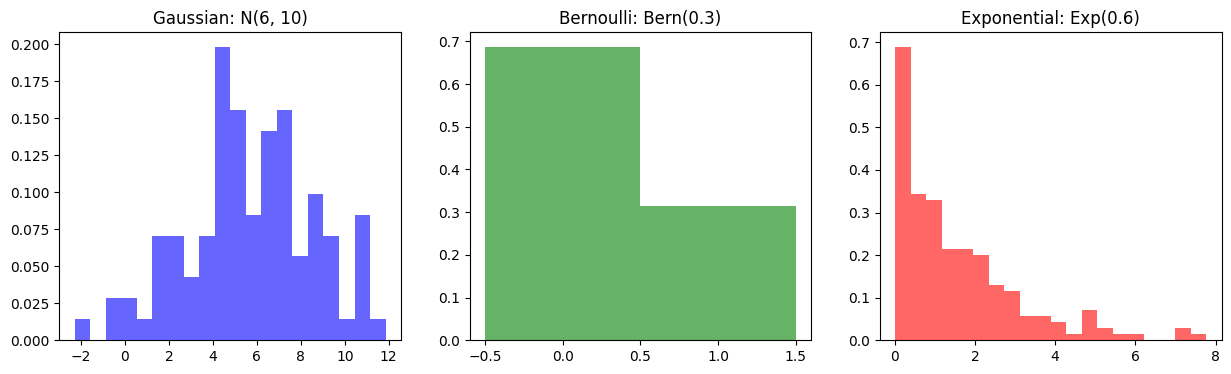

MLE for Gaussian: Mean = 5.672, Variance = 8.165
MLE for Bernoulli: p = 0.313
MLE for Exponential: lambda = 0.640


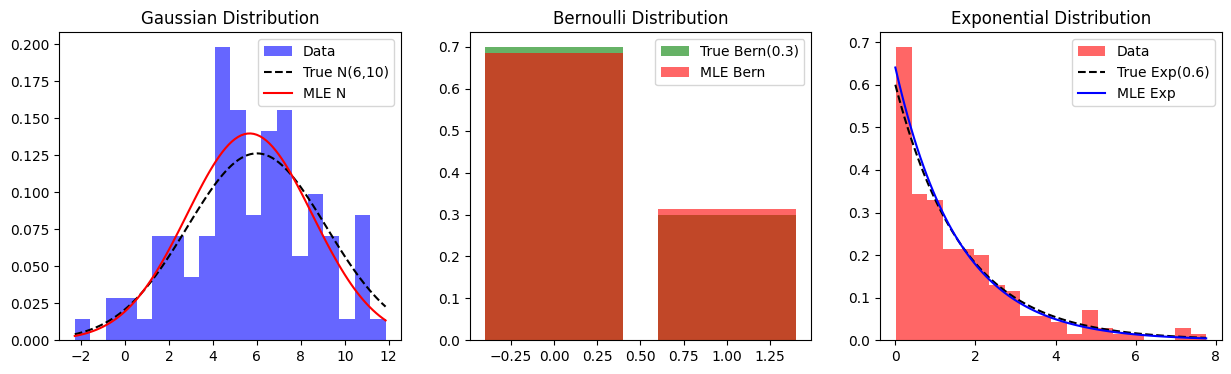

n=50: Gaussian MLE -> Mean = 6.300, Variance = 9.843
n=50: Bernoulli MLE -> p = 0.240
n=50: Exponential MLE -> lambda = 0.884
n=200: Gaussian MLE -> Mean = 5.842, Variance = 10.285
n=200: Bernoulli MLE -> p = 0.305
n=200: Exponential MLE -> lambda = 0.565
n=500: Gaussian MLE -> Mean = 6.297, Variance = 10.052
n=500: Bernoulli MLE -> p = 0.284
n=500: Exponential MLE -> lambda = 0.585


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, expon

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Generate datasets
n1, n2, n3 = 100, 150, 180
data_gaussian = np.random.normal(6, np.sqrt(10), n1)
data_bernoulli = np.random.binomial(1, 0.3, n2)
data_exponential = np.random.exponential(1/0.6, n3)

# Step 2: Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(data_gaussian, bins=20, alpha=0.6, color='b', density=True)
axes[0].set_title("Gaussian: N(6, 10)")
axes[1].hist(data_bernoulli, bins=[-0.5, 0.5, 1.5], alpha=0.6, color='g', density=True)
axes[1].set_title("Bernoulli: Bern(0.3)")
axes[2].hist(data_exponential, bins=20, alpha=0.6, color='r', density=True)
axes[2].set_title("Exponential: Exp(0.6)")
plt.show()

# Step 3: MLE parameter estimation
mu_mle = np.mean(data_gaussian)
sigma2_mle = np.var(data_gaussian, ddof=0)  # MLE of variance
p_mle = np.mean(data_bernoulli)  # MLE of p
lambda_mle = 1 / np.mean(data_exponential)  # MLE of lambda

print(f"MLE for Gaussian: Mean = {mu_mle:.3f}, Variance = {sigma2_mle:.3f}")
print(f"MLE for Bernoulli: p = {p_mle:.3f}")
print(f"MLE for Exponential: lambda = {lambda_mle:.3f}")

# Step 4: Plot data with ground truth and MLE-based distributions
x_gauss = np.linspace(min(data_gaussian), max(data_gaussian), 100)
x_exp = np.linspace(0, max(data_exponential), 100)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Gaussian
axes[0].hist(data_gaussian, bins=20, density=True, alpha=0.6, color='b', label="Data")
axes[0].plot(x_gauss, norm.pdf(x_gauss, 6, np.sqrt(10)), 'k--', label="True N(6,10)")
axes[0].plot(x_gauss, norm.pdf(x_gauss, mu_mle, np.sqrt(sigma2_mle)), 'r-', label="MLE N")
axes[0].legend()
axes[0].set_title("Gaussian Distribution")

# Bernoulli
axes[1].bar([0, 1], [0.7, 0.3], alpha=0.6, color='g', label="True Bern(0.3)")
axes[1].bar([0, 1], [1-p_mle, p_mle], alpha=0.6, color='r', label="MLE Bern")
axes[1].legend()
axes[1].set_title("Bernoulli Distribution")

# Exponential
axes[2].hist(data_exponential, bins=20, density=True, alpha=0.6, color='r', label="Data")
axes[2].plot(x_exp, expon.pdf(x_exp, scale=1/0.6), 'k--', label="True Exp(0.6)")
axes[2].plot(x_exp, expon.pdf(x_exp, scale=1/lambda_mle), 'b-', label="MLE Exp")
axes[2].legend()
axes[2].set_title("Exponential Distribution")

plt.show()

# Step 5: Change n and check MLE
n_values = [50, 200, 500]
for n in n_values:
    data_gaussian = np.random.normal(6, np.sqrt(10), n)
    data_bernoulli = np.random.binomial(1, 0.3, n)
    data_exponential = np.random.exponential(1/0.6, n)

    mu_mle = np.mean(data_gaussian)
    sigma2_mle = np.var(data_gaussian, ddof=0)
    p_mle = np.mean(data_bernoulli)
    lambda_mle = 1 / np.mean(data_exponential)

    print(f"n={n}: Gaussian MLE -> Mean = {mu_mle:.3f}, Variance = {sigma2_mle:.3f}")
    print(f"n={n}: Bernoulli MLE -> p = {p_mle:.3f}")
    print(f"n={n}: Exponential MLE -> lambda = {lambda_mle:.3f}")
